# Compare Embedding Experiment Runs for Next Word Prediction
- 03-11-20
- Joel Stremmel

**Problem Statement:** Because communication costs are steep in the federated setting, every round counts toward learning word representations.  We propose a simple method to leverage pretrained word representations in the federated setting to reduce training time and achieve a small increase in test accuracy.

**Experiments:** The experiments reported in this notebook consist of fitting an LSTM model as described in the "Adaptive Federated Optimization Paper"](https://arxiv.org/pdf/2003.00295.pdf) from Google Research using randomly initialized embeddings and then pretrained word embeddings from GPT2 of reduced dimensionality according to the [algorithm from Raunak et al.](https://www.aclweb.org/anthology/W19-4328.pdf)

**Results:** The notebook plots the train and validation accuracy from these approaches and computes the average validation set performance from the last 100 training rounds.  Accuracy is reported as **Accuracy No OOV No EOS.**

### Imports

In [1]:
import os, sys, io
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from src import dataset, validation

### Load Accuracy and Loss Arrays from Both Models (Batch Size 16)

In [4]:
network = '96_670_96'

In [5]:
random_train_loss = np.load('../experiment_runs/0_random_{}/train_loss.npy'.format(network))
random_train_accuracy = np.load('../experiment_runs/0_random_{}/train_accuracy_no_oov_no_eos.npy'.format(network))
random_val_loss = np.load('../experiment_runs/0_random_{}/val_loss.npy'.format(network))
random_val_accuracy = np.load('../experiment_runs/0_random_{}/val_accuracy_no_oov_no_eos.npy'.format(network))

In [6]:
pp_pca_pp_gpt2_train_loss = np.load('../experiment_runs/0_pp_pca_pp_gpt2_{}/train_loss.npy'.format(network))
pp_pca_pp_gpt2_train_accuracy = np.load('../experiment_runs/0_pp_pca_pp_gpt2_{}/train_accuracy_no_oov_no_eos.npy'.format(network))
pp_pca_pp_gpt2_val_loss = np.load('../experiment_runs/0_pp_pca_pp_gpt2_{}/val_loss.npy'.format(network))
pp_pca_pp_gpt2_val_accuracy = np.load('../experiment_runs/0_pp_pca_pp_gpt2_{}/val_accuracy_no_oov_no_eos.npy'.format(network))

### Plot Train and Validation Loss

In [7]:
x_axis = range(0, len(random_train_loss))

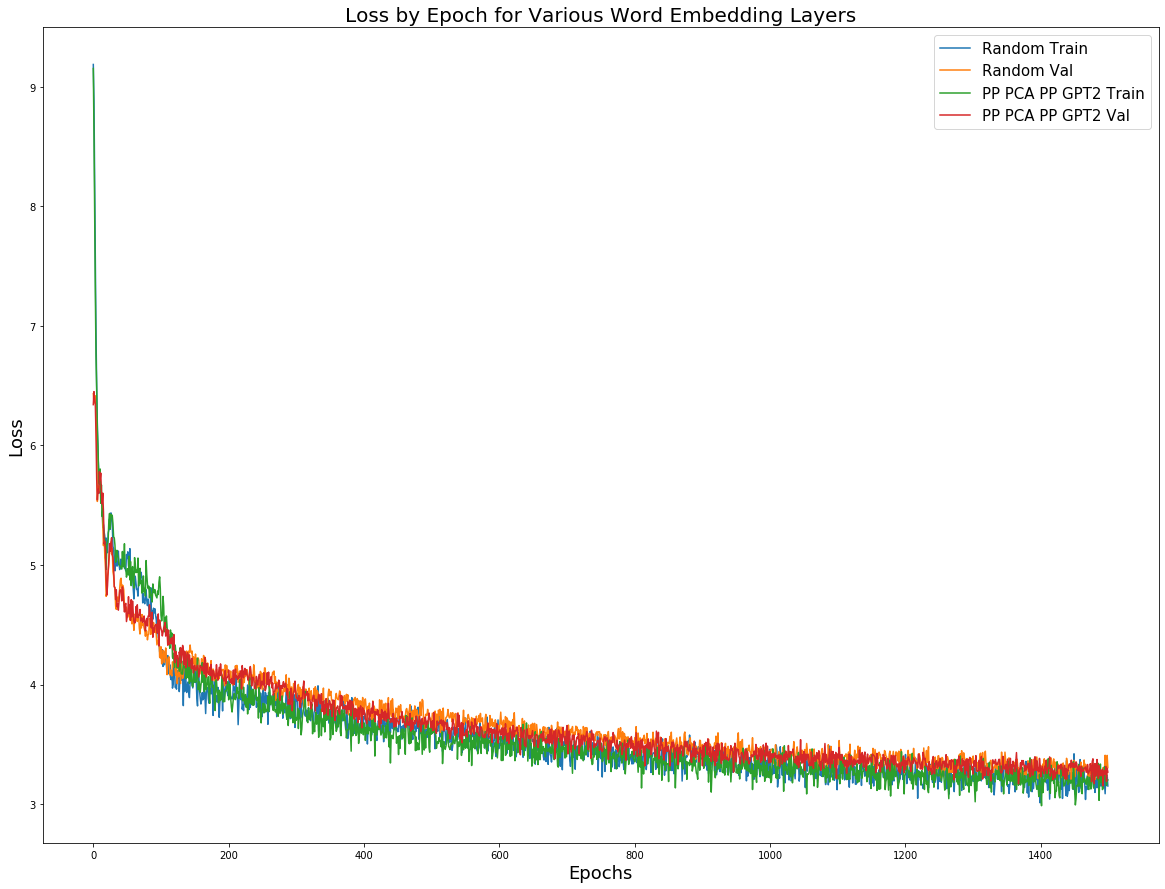

In [8]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_loss, label='Random Train')
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_loss, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Validation Loss

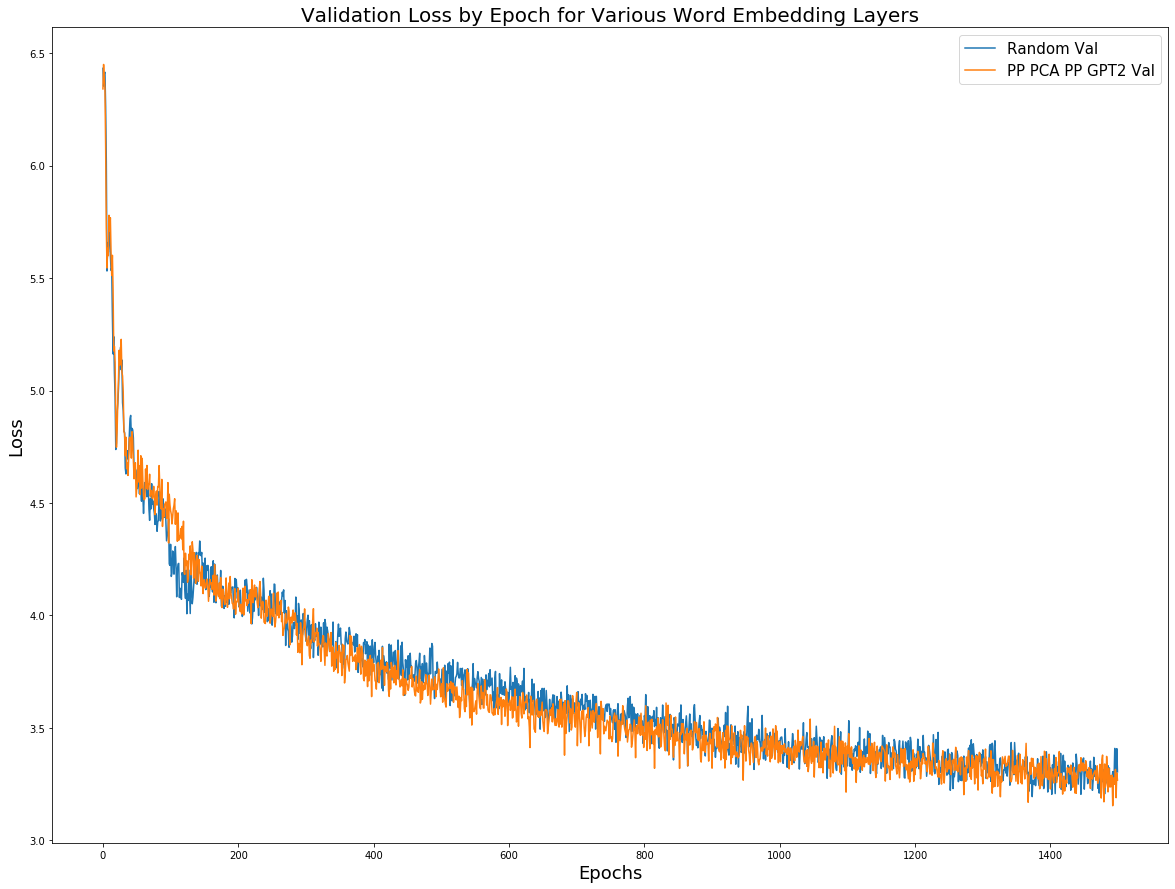

In [9]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Train and Validation Accuracy

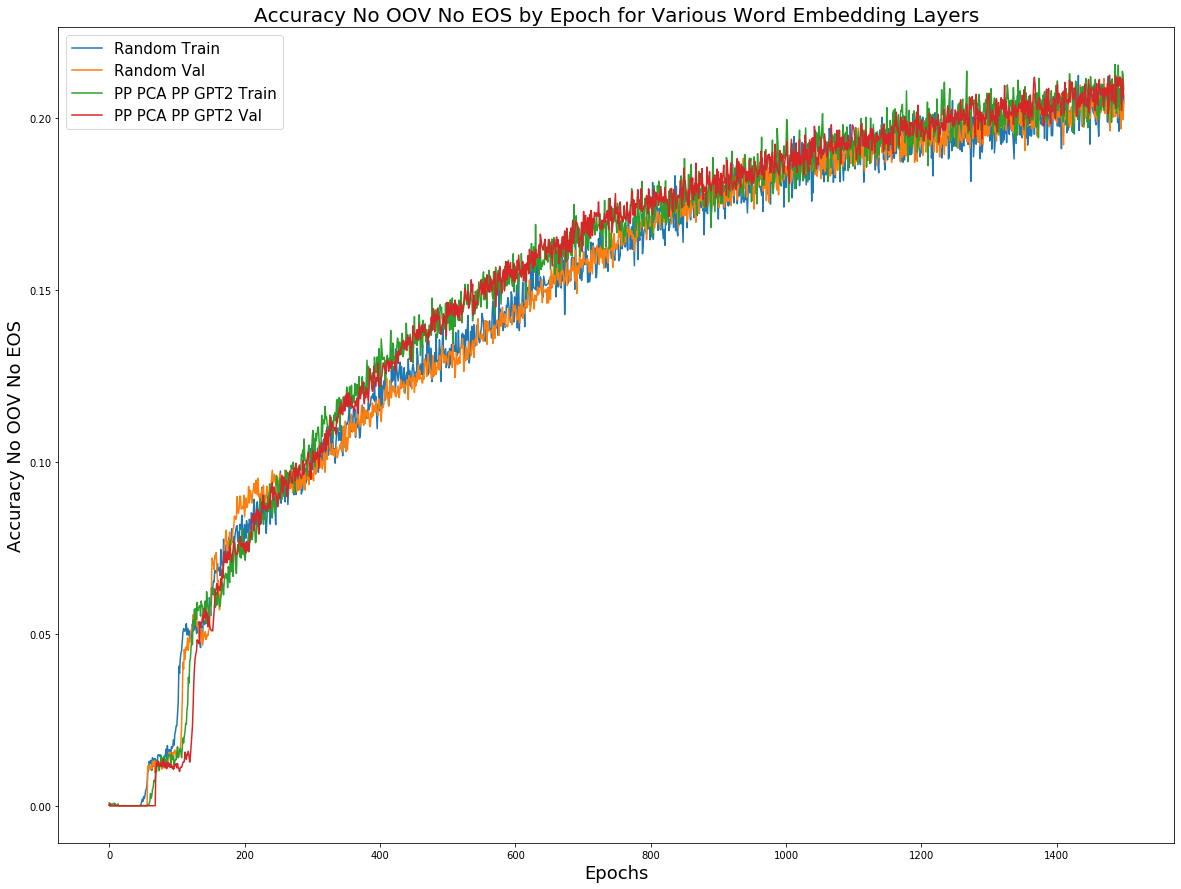

In [10]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_accuracy, label='Random Train')
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_accuracy, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Accuracy No OOV No EOS by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy No OOV No EOS', fontsize=18)
plt.show()

### Plot Validation Accuracy from Small Model

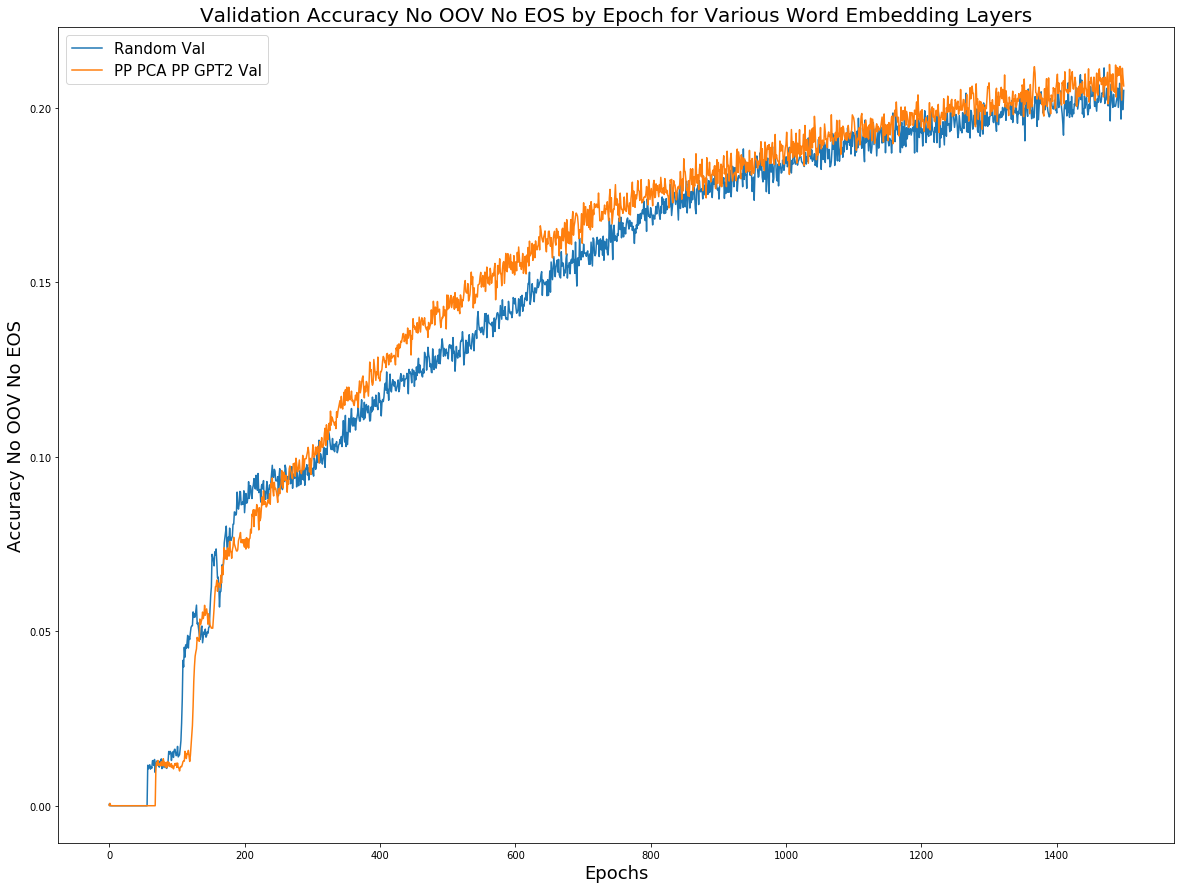

In [11]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Accuracy No OOV No EOS by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy No OOV No EOS', fontsize=18)
plt.show()

### Compare Validation Accuracy from Last 100 Training Rounds

In [12]:
np.mean(random_val_accuracy[-100:])

0.20187682

In [13]:
np.mean(pp_pca_pp_gpt2_val_accuracy[-100:])

0.20651019